In [7]:
from fastspt import simulate, fit2, tracklen

%matplotlib inline

%load_ext autoreload

%autoreload 2

# 1. Simulation tools

`simulate` module implements 2-state model simulations

## Single track

In [2]:
track = simulate.track()
track

      x [um]    y [um]  t [sec]  frame []  sigma [um]  free []  id []
0   0.144001  0.058629     0.00       0.0    0.017794      1.0    0.0
1   0.213881  0.034639     0.06       1.0    0.013399      1.0    0.0
2   0.232509  0.210956     0.12       2.0    0.027610      1.0    0.0
3   0.092754  0.108458     0.18       3.0    0.025992      1.0    0.0
4   0.154235  0.162895     0.24       4.0    0.020729      1.0    0.0
5   0.184442  0.212472     0.30       5.0    0.022771      1.0    0.0
6   0.218133  0.232447     0.36       6.0    0.023176      1.0    0.0
7   0.293442  0.136077     0.42       7.0    0.022129      1.0    0.0
8   0.369808  0.139146     0.48       8.0    0.023829      1.0    0.0
9   0.271380  0.030086     0.54       9.0    0.021036      1.0    0.0
10  0.114020 -0.059818     0.60      10.0    0.020444      1.0    0.0

In [3]:
track.xy

array([[ 0.14400125,  0.05862888],
       [ 0.213881  ,  0.03463927],
       [ 0.23250908,  0.21095604],
       [ 0.09275368,  0.10845834],
       [ 0.15423495,  0.1628945 ],
       [ 0.18444194,  0.21247201],
       [ 0.2181327 ,  0.23244732],
       [ 0.29344192,  0.13607652],
       [ 0.36980816,  0.13914632],
       [ 0.27137963,  0.03008612],
       [ 0.11401957, -0.05981757]])

In [4]:
track.sigma

array([[0.01779372],
       [0.01339944],
       [0.02760951],
       [0.02599227],
       [0.02072912],
       [0.02277063],
       [0.02317601],
       [0.02212918],
       [0.02382936],
       [0.02103586],
       [0.02044426]])

In [8]:
# Default parameters
simulate.track(track_id=0,
    start_time=0,
    dt=0.06,
    D_bound=0.02,
    D_free=0.06,
    loc_error=0.02,
    p_binding=0.0001,
    p_unbinding=0.001,
    p_bleaching=0.1,
    p_out_of_focus=0.01,
    min_len=5,
)

      x [um]    y [um]  t [sec]  frame []  sigma [um]  free []  id []
0   0.037093 -0.016130     0.00       0.0    0.021216      1.0    0.0
1   0.070612 -0.074427     0.06       1.0    0.023122      1.0    0.0
2   0.055620 -0.168274     0.12       2.0    0.022617      1.0    0.0
3   0.011222 -0.247830     0.18       3.0    0.022793      1.0    0.0
4  -0.065123 -0.217106     0.24       4.0    0.019906      1.0    0.0
5  -0.033857 -0.399629     0.30       5.0    0.017531      1.0    0.0
6  -0.073483 -0.355646     0.36       6.0    0.024266      1.0    0.0
7  -0.147207 -0.451540     0.42       7.0    0.018541      1.0    0.0
8  -0.168665 -0.439239     0.48       8.0    0.019386      1.0    0.0
9  -0.211299 -0.356403     0.54       9.0    0.025227      1.0    0.0
10 -0.137801 -0.390419     0.60      10.0    0.023792      1.0    0.0
11 -0.166162 -0.504614     0.66      11.0    0.020658      1.0    0.0
12 -0.088562 -0.591229     0.72      12.0    0.021228      1.0    0.0
13 -0.180478 -0.5347

## List of tracks

In [21]:
tracks = simulate.tracks(
    num_tracks=1000.0,
    dt=0.06,
    D_bound=0.0,
    D_free=0.05,
    loc_error=0.02,
    p_binding=0.0001,
    p_unbinding=0.001,
    p_bleaching=0.1,
    p_out_of_focus=1e-05,
    min_len=2,
    use_tqdm=True,)

In [24]:
len(tracks)

1000

4000 tracks, 59616 localizations
Fit result: 782.75 * e^(-x/9.19) + 0.93


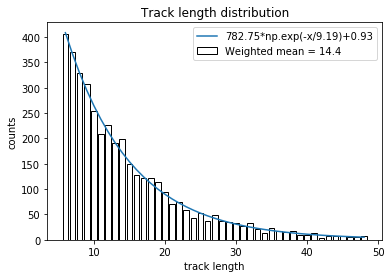

{'decay rate': 0.10876371080437398}

In [53]:
tracklen.get_track_lengths_dist(tracks, max_len=50)

# 2. Fit kinetics

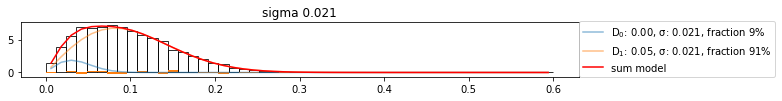

In [26]:
# fit one lag (1 Δt)
fit = fit2.fit_spoton_2_0(tracks)

In [27]:
fit

{'sigma': [0.02103118210009932],
 'D': [0.0, 0.048521562597216183],
 'F': [0.0912513459069092, 0.9087486540930908],
 'dt': 0.06,
 'n_tracks': 1000,
 'chi2': 0.6499014556913107,
 'chi2_norm': 0.012998029113826215,
 'n_iter': 36,
 'path': None}

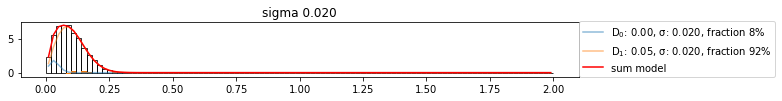

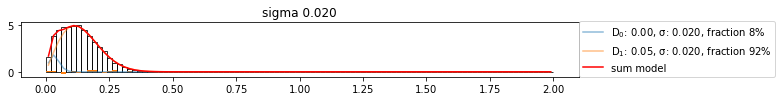

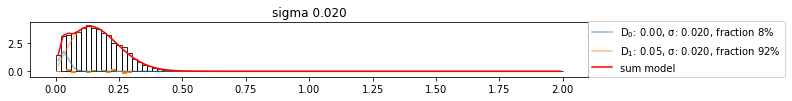

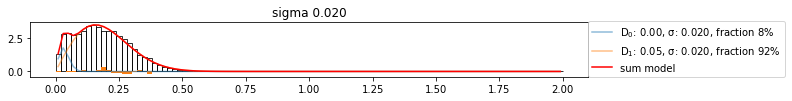

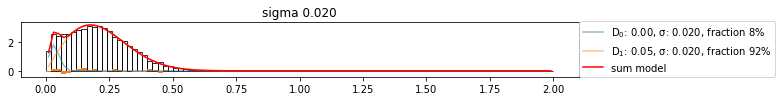

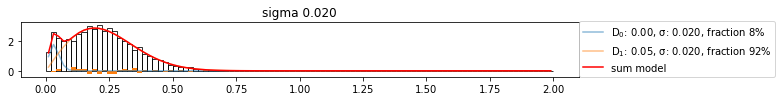

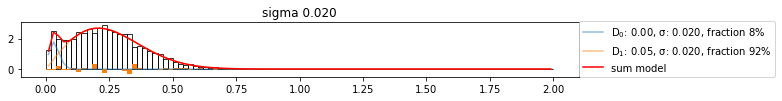

In [28]:
# fit 5 lags (1..5 Δt)

fit = fit2.fit_spoton_2_0(tracks, n_lags=7, return_fit_result=1, D=(0.05, 0.5), n_bins=100, max_um=2)

In [29]:
fit['fit_result']

## simulate and fit 3 states

In [31]:
tracks_3_states = simulate.tracks(D_free=0.04) + simulate.tracks(D_free=0.01)

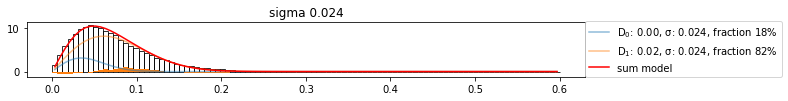

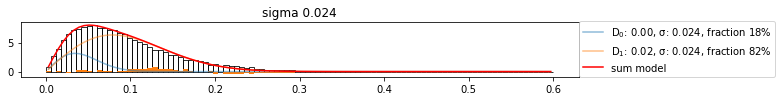

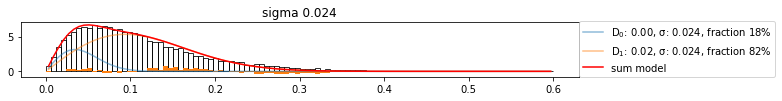

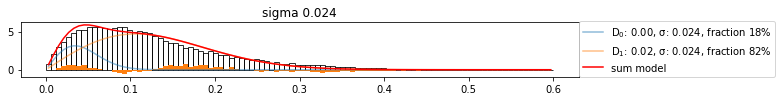

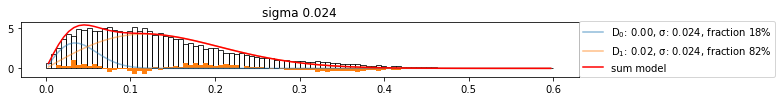

In [32]:
#first try 2-state fit
fit_2_states = fit2.fit_spoton_2_0(tracks_3_states, n_lags=5, n_bins=100)

In [33]:
fit_2_states['chi2']

33.40863492521527

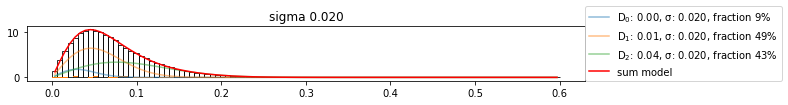

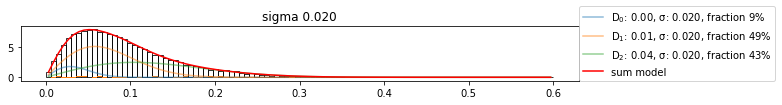

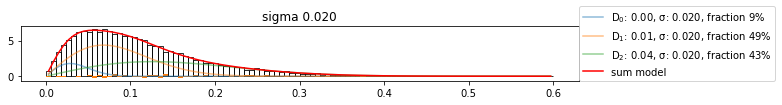

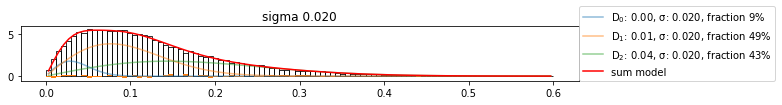

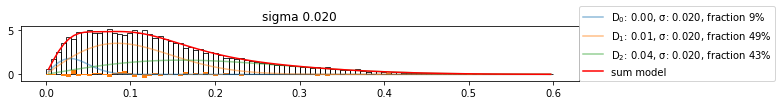

In [34]:
# Try 3-states fit

fit_3_states = fit2.fit_spoton_2_0(
    tracks_3_states, 
    n_lags=5, 
    n_bins=100,
    D=(0,0.05,0.2),
    fit_D=(1,1,1,),
    F=(0.3,0.3,0.4),
    fit_F=(1,1,1)
)

In [35]:
fit_3_states['chi2']

4.505726385854258

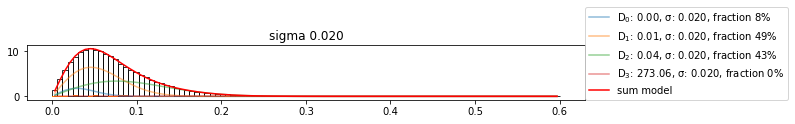

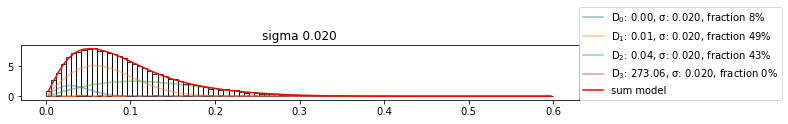

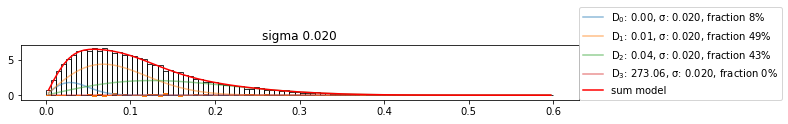

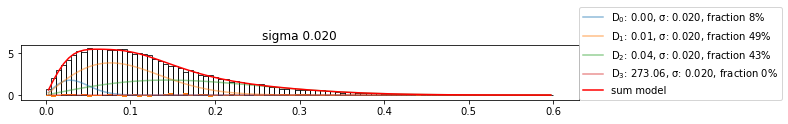

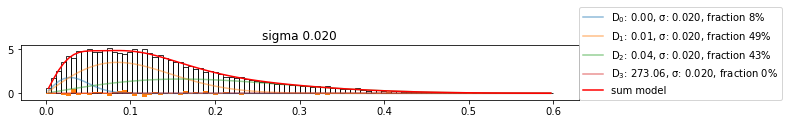

In [38]:
# 4 states, maybe?? Why not!


fit_4_states = fit2.fit_spoton_2_0(
    tracks_3_states, 
    n_lags=5, 
    n_bins=100,
    D=(0,0.01,0.2,0.3),
    fit_D=(1,1,1,1),
    F=(0.3,0.3,0.2,0.2),
    fit_F=(1,1,1,1)
)

In [39]:
fit_4_states

{'sigma': [0.020276712392043015],
 'D': [0.0, 0.010466480262154132, 0.04125098146797668, 273.05670511614534],
 'F': [0.08492189443726522,
  0.4874984370614759,
  0.42624386380512436,
  0.0013358046961345904],
 'dt': 0.06,
 'n_tracks': 2000,
 'chi2': 4.501743295891444,
 'chi2_norm': 0.009003486591782888,
 'n_iter': 263,
 'path': None}

In [40]:
fit_4_states['chi2']

4.501743295891444

In [41]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Fit of 3-states simulated data')

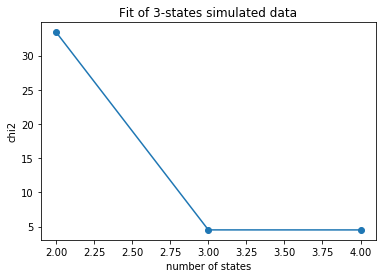

In [42]:
all_fits = [fit_2_states, fit_3_states, fit_4_states]
chi2s = [f['chi2'] for f in all_fits]
n_states = [len(f['D']) for f in all_fits]
plt.plot(n_states, chi2s, 'o-')
plt.xlabel('number of states')
plt.ylabel('chi2')
plt.title('Fit of 3-states simulated data')


## Test the speed

In [36]:
# 2 states with bound state
data = [simulate.tracks(num_tracks=1e3, D_bound=0.0, D_free=0.05, use_tqdm=False) for _ in fit2.tqdm(range(10))]

In [41]:
fits = [fit2.fit_spoton_2_0(d, D=(0., .1),plot=False, n_lags=1, max_um=0.5, n_bins=50) for d in fit2.tqdm(data)]

In [42]:
fit2.result_2_table(*fits)

,sigma_0,D_0,D_1,F_0,F_1,dt,n_tracks,chi2,chi2_norm,n_iter
replicate,,,,,,,,,,
0,0.018771,0.0,0.051226,0.088622,0.911378,0.06,1000,0.389344,0.007787,31
1,0.019113,0.0,0.051178,0.092586,0.907414,0.06,1000,1.116659,0.022333,31
2,0.017934,0.0,0.051067,0.082456,0.917544,0.06,1000,0.383525,0.007671,31
3,0.021287,0.0,0.049118,0.117851,0.882149,0.06,1000,0.715100,0.014302,36
4,0.019670,0.0,0.049474,0.084822,0.915178,0.06,1000,0.711687,0.014234,36
5,0.017038,0.0,0.050347,0.062531,0.937469,0.06,1000,0.992332,0.019847,31
6,0.020475,0.0,0.050147,0.095705,0.904295,0.06,1000,0.642176,0.012844,36
7,0.020056,0.0,0.050317,0.086381,0.913619,0.06,1000,0.693051,0.013861,36
8,0.018954,0.0,0.051013,0.069171,0.930829,0.06,1000,0.612250,0.012245,31


In [65]:
# 2 unbound states
print('simulate 10 datasets')
data = [simulate.tracks(num_tracks=4e3, D_bound=0.05, D_free=0.5, use_tqdm=False) for _ in fit2.tqdm(range(10))]

simulate 10 datasets


[autoreload of fastspt.core.track failed: Traceback (most recent call last):
  File "/home/jovian/andrey/Documents/Spot-On-cli/fastspt/core/track.py", line 46, in __getattr__
    ind = self.columns.index(item)
ValueError: 'items' is not in list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in

In [66]:
# dibabling plot dramatically improves performance!
print('start fit')
fits = [fit2.fit_spoton_2_0(d, D=(0.2, 1),plot=False, n_lags=7, max_um=2, n_bins=50, return_fit_result=True) for d in fit2.tqdm(data)]

start fit


In [67]:
table = fit2.result_2_table(*fits)
table.loc['mean'] = table.mean(0)
table.loc['std'] = table.std(0)
table

,sigma_0,D_0,D_1,F_0,F_1,dt,n_tracks,chi2,chi2_norm,n_iter
replicate,,,,,,,,,,
0,0.024416,0.020409,0.498239,0.082992,0.917008,6.000000e-02,4000.0,0.076895,0.000220,42.000000
1,0.024270,0.021001,0.497856,0.086351,0.913649,6.000000e-02,4000.0,0.082402,0.000235,57.000000
2,0.023593,0.020297,0.492155,0.098262,0.901738,6.000000e-02,4000.0,0.107003,0.000306,53.000000
3,0.023269,0.022096,0.503353,0.092271,0.907729,6.000000e-02,4000.0,0.094678,0.000271,41.000000
4,0.022419,0.019924,0.505465,0.096067,0.903933,6.000000e-02,4000.0,0.127279,0.000364,55.000000
5,0.019961,0.021874,0.497314,0.095658,0.904342,6.000000e-02,4000.0,0.100378,0.000287,41.000000
6,0.020527,0.021503,0.497432,0.083172,0.916828,6.000000e-02,4000.0,0.082515,0.000236,52.000000
7,0.020718,0.021621,0.499975,0.090965,0.909035,6.000000e-02,4000.0,0.106951,0.000306,59.000000
8,0.020837,0.021286,0.502348,0.091780,0.908220,6.000000e-02,4000.0,0.092060,0.000263,58.000000


In [43]:
# simulate unbound molecules
tracks = simulate.tracks(D_bound=0.05, D_free=0.5, num_tracks=4e3)

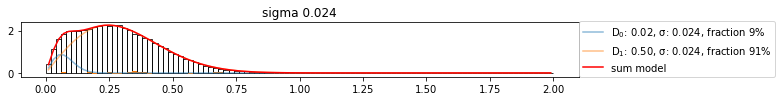

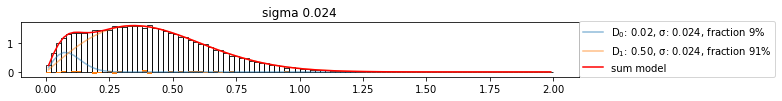

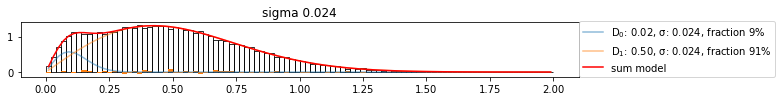

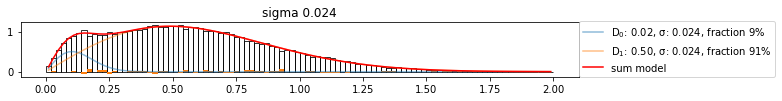

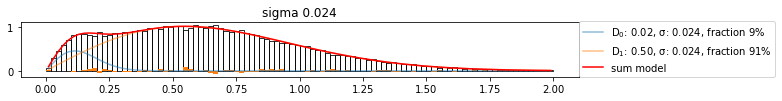

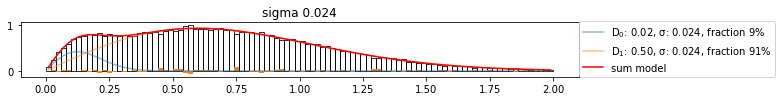

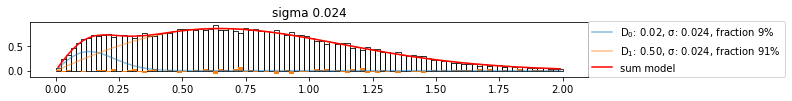

{'sigma': [0.02406608023261869],
 'D': [0.019566203452656694, 0.49598974976408416],
 'F': [0.08534767742701121, 0.9146523225729888],
 'dt': 0.06,
 'n_tracks': 4000,
 'chi2': 0.33850836735182666,
 'chi2_norm': 0.0004835833819311809,
 'n_iter': 59,
 'path': None}

In [46]:
fit2.fit_spoton_2_0(tracks, D=(0.1, 1), max_um=2, n_bins=100, n_lags=7)

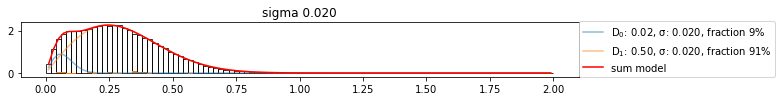

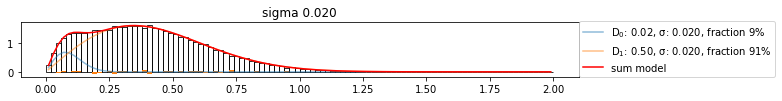

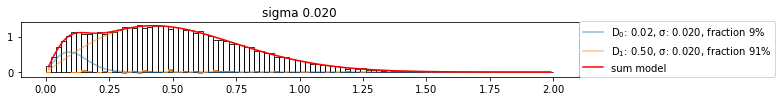

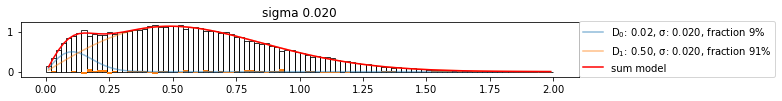

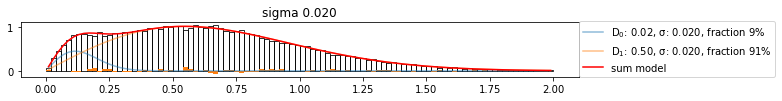

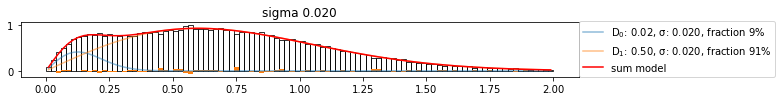

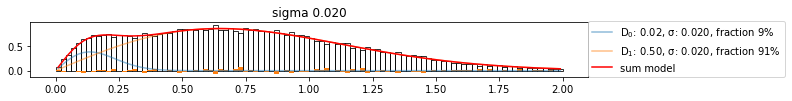

{'sigma': [0.02],
 'D': [0.020709142906148337, 0.49717533830317984],
 'F': [0.08514925903086229, 0.9148507409691378],
 'dt': 0.06,
 'n_tracks': 4000,
 'chi2': 0.34519437651314966,
 'chi2_norm': 0.0004931348235902138,
 'n_iter': 34,
 'path': None}

In [47]:
# fix sigma
fit2.fit_spoton_2_0(tracks, D=(0.1, 1), max_um=2, n_bins=100, n_lags=7, sigma=(0.02,), fit_sigma=(False,))